### **Implementation Details**


#### **Step 3: Exploratory Analysis and Baseline Sentiment Analysis Using VADER**
abc abc to be updated





In [108]:
# Libraries

import nltk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re
import string

# Download the lexicon
nltk.download("vader_lexicon")
from nltk.probability import FreqDist

from wordcloud import WordCloud

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [109]:
df = pd.read_pickle('../source/nlp_cleaned_df.pkl')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,cleaned_tweets,final_cleaned_tweets
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,taking account personal bad everyone better tr...,taking account personal bad everyone better tr...
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,whats song voting,whats song voting
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,speak opinion like rest us opinion vote republ...,speak opinion like rest u opinion vote republi...
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,hey district please vote,hey district please vote
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,vote blue matter,vote blue matter


In [110]:
# Calculate Tokens
def unfiltered_tokens(text):
    wordtokens = nltk.word_tokenize(text)
    return wordtokens

data_tweets = df['cleaned_tweets']
unfilterd_data = list(map(unfiltered_tokens, data_tweets))
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]
# getting frequency distribution
corpus_freqdist = FreqDist(flat_unfiltered)
corpus_freqdist.most_common(20)


[('vote', 9827),
 ('voting', 4086),
 ('election', 3992),
 ('democrats', 2675),
 ('republican', 1980),
 ('people', 1836),
 ('tomorrow', 1538),
 ('year', 1280),
 ('like', 1124),
 ('day', 1114),
 ('get', 1100),
 ('pay', 1012),
 ('favorite', 972),
 ('red', 930),
 ('blue', 863),
 ('dont', 835),
 ('us', 831),
 ('one', 828),
 ('want', 803),
 ('would', 793)]

In [111]:
data_nlptweets = df['final_cleaned_tweets']
processed_data = list(map(unfiltered_tokens, data_nlptweets))
flat_processed = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
corpus_freqdist2 = FreqDist(flat_processed)
corpus_freqdist2.most_common(20)

[('vote', 9827),
 ('voting', 4086),
 ('election', 3992),
 ('democrat', 3238),
 ('republican', 1980),
 ('people', 1836),
 ('tomorrow', 1538),
 ('day', 1299),
 ('year', 1280),
 ('like', 1124),
 ('get', 1100),
 ('pay', 1012),
 ('u', 981),
 ('favorite', 972),
 ('red', 930),
 ('blue', 868),
 ('dont', 835),
 ('one', 828),
 ('want', 803),
 ('would', 793)]

In [112]:
# create counts of hate and not hate with values and words
clean_bar_counts = [x[1] for x in corpus_freqdist.most_common(20)]
clean_bar_words = [x[0] for x in corpus_freqdist.most_common(20)]

cleanNLP_bar_counts = [x[1] for x in corpus_freqdist2.most_common(20)]
cleanNLP_bar_words = [x[0] for x in corpus_freqdist2.most_common(20)]

# set the color of the bar graphs
color = cm.BuGn(np.linspace(.4,.8, 30))

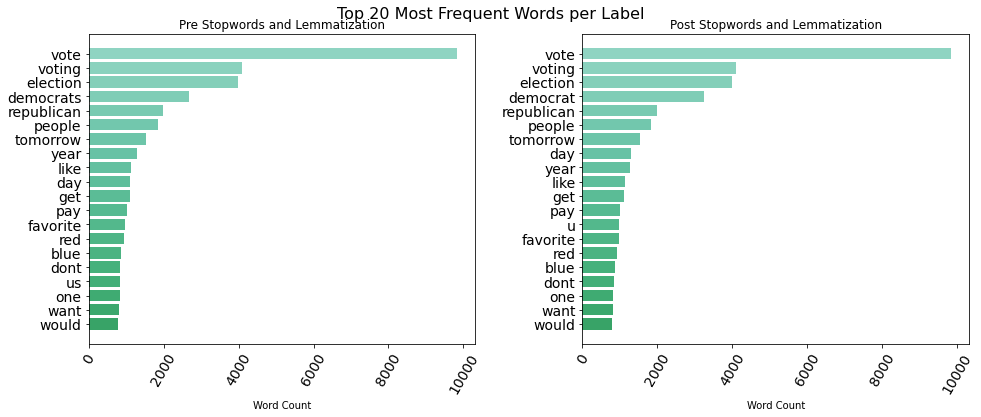

In [113]:
new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

# generating a bar chart on each axes
ax.barh(clean_bar_words, clean_bar_counts, color=color)
ax2.barh(cleanNLP_bar_words, cleanNLP_bar_counts, color=color)

ax.title.set_text('Pre Stopwords and Lemmatization')
ax2.title.set_text('Post Stopwords and Lemmatization')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)

plt.savefig('../visualization/label_word_count_y.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

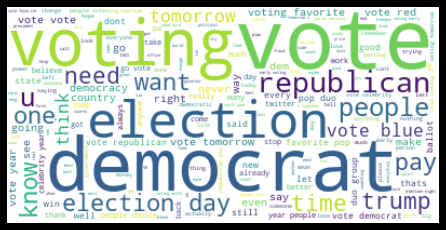

<Figure size 432x288 with 0 Axes>

In [114]:
tweet_string = ','.join(list(df['final_cleaned_tweets'].values))  ## Joining processed tweets to form a string
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')  # Wordcloud Object
word_object = wordcloud.generate(tweet_string)  ## Generating wordcloud

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(word_object, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('../visualization/wordcloud.png')

* Sentiment Analysis using Vader

In [115]:
# Helper function
# format VADER's output based on compound

def format_polarity(vader_obj):
  polarity = "neutral"
  if(vader_obj['compound']>= 0.05):
    polarity = "positive"
  elif(vader_obj['compound']<= -0.05):
    polarity = "negative"
  return polarity

# get polarity
def predict_sentiment(text):
  vader_obj =  sent_analyzer.polarity_scores(text)
  return format_polarity(vader_obj)

#get vader predictions 
def get_vader_obj(text):
  vader_obj =  sent_analyzer.polarity_scores(text)
  return vader_obj

In [116]:
# Run the predictions on tweet, cleaned and nlp final columns
df["sentiment_Original"] = df["tweet"].apply(predict_sentiment)
df["sentiment_cleaned"] = df["cleaned_tweets"].apply(predict_sentiment)
df["sentiment_nlpfinal"] = df["final_cleaned_tweets"].apply(predict_sentiment)

# Vader Polarity object for final tweets
df["vader_polarity"] = df["final_cleaned_tweets"].apply(get_vader_obj)
df.head()

df.to_pickle('../source/nlp_sentiments.pkl')

In [117]:
# Visualization change in Sentiment with Text processing

sentiments_orig = df['sentiment_Original'].value_counts()
sentiments_orig

positive    8143
negative    5449
neutral     5094
Name: sentiment_Original, dtype: int64

In [118]:
# Visualization change in Sentiment with Text processing

sentiments_cleanedtweets = df['sentiment_cleaned'].value_counts()
sentiments_cleanedtweets

positive    7456
neutral     6467
negative    4763
Name: sentiment_cleaned, dtype: int64

In [119]:
# Visualization change in Sentiment with Text processing

sentiments_nlpcleaned = df['sentiment_nlpfinal'].value_counts()
sentiments_nlpcleaned

positive    7475
neutral     6484
negative    4727
Name: sentiment_nlpfinal, dtype: int64

([<matplotlib.patches.Wedge at 0x20406e21190>,
 [Text(-1.099592584521943, 0.02993573223347142, 'Neutral'),
  Text(0.6977680541572018, -0.8503644763262824, 'Positive'),
  Text(0.6932947240636452, 0.8540154715141374, 'Negative')],
 [Text(-0.5997777733756051, 0.016328581218257136, '43.6%'),
  Text(0.3806007568130191, -0.4638351689052449, '29.2%'),
  Text(0.37816075858017006, 0.46582662082589305, '27.3%')])

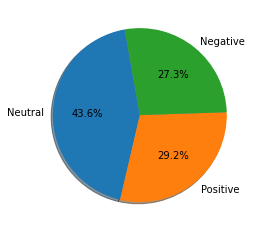

In [120]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments_orig, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

([<matplotlib.patches.Wedge at 0x20401a5a5e0>,
 [Text(-1.0888160785906793, 0.15645941007946937, 'Neutral'),
  Text(0.6456524750962185, -0.8905800814088126, 'Positive'),
  Text(0.6447203915242087, 0.8912550795102776, 'Negative')],
 [Text(-0.5938996792312796, 0.08534149640698328, '39.9%'),
  Text(0.35217407732521006, -0.48577095349571586, '34.6%'),
  Text(0.35166566810411376, 0.48613913427833316, '25.5%')])

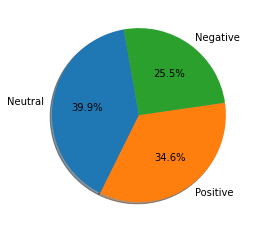

In [121]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments_cleanedtweets, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

([<matplotlib.patches.Wedge at 0x2040a6066a0>,
 [Text(-1.089310309969742, 0.15298054972323946, 'Neutral'),
  Text(0.653859740856471, -0.8845718960531748, 'Positive'),
  Text(0.6393144602704866, 0.8951407827202694, 'Negative')],
 [Text(-0.5941692599834956, 0.08344393621267605, '40.0%'),
  Text(0.3566507677398933, -0.48249376148354983, '34.7%'),
  Text(0.3487169783293563, 0.48825860875651056, '25.3%')])

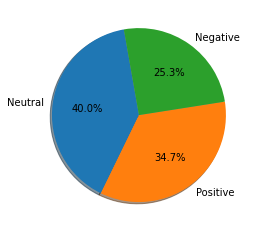

In [122]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments_nlpcleaned, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

* Parsing Polarity Scores

In [123]:
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,cleaned_tweets,final_cleaned_tweets,sentiment_Original,sentiment_cleaned,sentiment_nlpfinal,vader_polarity
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,taking account personal bad everyone better tr...,taking account personal bad everyone better tr...,positive,positive,positive,"{'neg': 0.271, 'neu': 0.403, 'pos': 0.326, 'co..."
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,whats song voting,whats song voting,positive,neutral,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,speak opinion like rest us opinion vote republ...,speak opinion like rest u opinion vote republi...,negative,positive,positive,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,hey district please vote,hey district please vote,positive,positive,positive,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp..."
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,vote blue matter,vote blue matter,negative,neutral,neutral,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


In [124]:
df_polarity = df.drop(['Unnamed: 0', 'Date', 'ID', 'location', 'tweet', 'num_of_likes','num_of_retweet', 'language' , 'cleaned_tweets' ,'sentiment_Original' , 'sentiment_cleaned'], axis=1)

In [125]:
df_polarity_scores = df_polarity['vader_polarity'].apply(pd.Series)

In [126]:
df_polarity_scores.head()

,neg,neu,pos,compound
0,0.271,0.403,0.326,0.5994
1,0.000,1.000,0.000,0.0000
2,0.000,0.828,0.172,0.3612
3,0.000,0.566,0.434,0.3182
4,0.000,0.645,0.355,0.0258


In [127]:
df_m1 = df[['final_cleaned_tweets','sentiment_nlpfinal']].copy()

In [128]:
df_merge = pd.merge(left=df_m1, left_index=True , right=df_polarity_scores, right_index= True, how='inner')

In [129]:
df_merge.head()

,final_cleaned_tweets,sentiment_nlpfinal,neg,neu,pos,compound
0,taking account personal bad everyone better tr...,positive,0.271,0.403,0.326,0.5994
1,whats song voting,neutral,0.000,1.000,0.000,0.0000
2,speak opinion like rest u opinion vote republi...,positive,0.000,0.828,0.172,0.3612
3,hey district please vote,positive,0.000,0.566,0.434,0.3182
4,vote blue matter,neutral,0.000,0.645,0.355,0.0258


In [130]:
scores_df = df_merge.groupby('sentiment_nlpfinal')['pos'].mean().reset_index(name='avg_positive')
scores_df['avg_neutral'] = df_merge.groupby('sentiment_nlpfinal')['neu'].mean()
scores_df['avg_negative'] = df_merge.groupby('sentiment_nlpfinal')['neg'].mean()
scores_df['avg_compound'] = df_merge.groupby('sentiment_nlpfinal')['compound'].mean()

scores_df.head()

,sentiment_nlpfinal,avg_positive,avg_neutral,avg_negative,avg_compound
0,negative,0.070076,NaN,NaN,NaN
1,neutral,0.009765,NaN,NaN,NaN
2,positive,0.393567,NaN,NaN,NaN
